# Tasks
***

#### Introduction to the abaolne data set


In [47]:
import pandas as pd 
import seaborn as sns
#import scipy.stats as ss - used in Chi square test

df = pd.read_csv('abalone.csv')
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


3 Within the notebook, discuss the classification of each variable (sex, length, diameter etc.) in the dataset based on common variable types (categorical, continuous, integer) and measurement scales (mm, grams etc) in mathematics, statistics, and Python.

## Types and Scales of Variables Used
#### Types
Sex is a categorical variable.
Length, diameter, height, whole_weight, shucked_weight, viscera_weight and shell weight are continuous.
Rings are integers. 

It is important to consider the difference between data types before beginning analysis, as they will influence the type of calculations that can be done. Categorical types of data assign the observed result to one of a few fixed, finite categories. In this case, the observation can be Female, Male or Infant. The rest of the data types are numeric; the length and mass measurements are continuous and the rings are integers. Continuous means that the numbers are real, and include all decimal numbers between whole numbers. Integers refers to whole numbers only. This makes sense when one thinks about the fact that it is a count of the number of rings found in the shell of the abalone - it would be difficult to have a fraction of a ring. 

#### Scale

Categorical values do not have numerical scale, the data just sits in the appropriate category it belongs to.
The continuous data in this dataset are made up of length measurements (in mm) and mass measurements (in grams). 

Having all lengths of the same unit and all masses of the same units of measurement makes it easier to compare lengths with each other and masses with each other. No unit conversion needs to take place within the Python code to scale all of the measurements with each other, and summary statistics such as average and standard deviation can be compared between different variables with no mathematical manipulation required. {scale when plotting}{scale if different units}{plotting logarithmically if data isn't close enough in scale}

If one wanted to do some rudimentary density calculations, this could be possible with the assumption of the Abalone specimens having an ellipsoid shape. Density is measured as mass per unit volume. The length measurements could be used to calculate volume {insert calculation}, but this would need to be converted from mm3 to cm3. 

#### Inputs vs outputs
When doing analysis below, all variables except Rings will be considered to be Input variables. This is because it is hoped that these input variables can be used to predict the output variable, age (which is known by the number of rings). 

## Summary statistics
Sex / nominal / -- / M, F, and I (infant)
For nominal/categorical data, calculations such as average/standard deviation are not possible. What is more appropriate here is to show the frequency of occurence for each category as well as a total count of samples. When using the .describe() function on non-numeric data, pandas reverts to the following summary data:

In [8]:
sdf = df['sex']
sdf
sdf.describe()

count     4177
unique       3
top          M
freq      1528
Name: sex, dtype: object

The 'unique' result above tells us there are 3 possible categories, which we know are M, F and I. The 'top' result tells us that there are majority M, occuring at a frequency 'freq' of 1528. Out of a total count of 4177, this is over a third of the results. 

In [10]:
1528/sdf.count()

0.3658127842949485

In [11]:
df['sex']=='M'

0        True
1        True
2       False
3        True
4       False
        ...  
4172    False
4173     True
4174     True
4175    False
4176     True
Name: sex, Length: 4177, dtype: bool

Length / continuous / mm / Longest shell measurement

Diameter	/ continuous / mm / perpendicular to length
Height / continuous / mm / with meat in sh
Average, std dev, median, min, max, correlation
ell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous	 / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after bein
Average, std dev, median, min, max, correlation
g dried
Rings / integer / -- / +1.5 gives the age 
Average, std dev, median, mode, min, max in years

#### 

5 Select, demonstrate, and explain the most suitable plot(s) for each variable.
How is the data distributed? 

Type of data will inform plot choice.
pairplot, violin plot, stripplot, box plot, count plot (sex), barplot, swarm plot, strip plot (https://www.geeksforgeeks.org/plotting-graph-using-seaborn-python/)
Sex - countplot



As stated above, sex is a categorical variable without numeric value. The most suitable plot for this variable is a histogram, which displays the frequency of occurence in the data set for each category.

Doesn't make intuitive sense to plot sex against age
For all other plots, colour code sex to show relationships

<Axes: xlabel='sex', ylabel='count'>

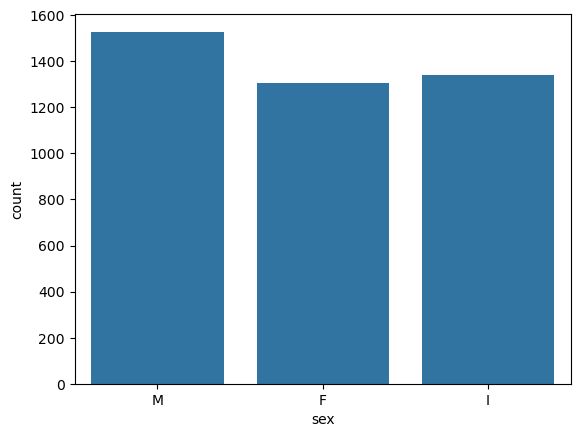

In [16]:
sns.countplot(data = df, x ='sex')

The distribution of the data approximates a uniform distribution. For this type of data, this is called a Categorical Distribution. This tells us that all of the abalone samples are approximately equally likely to be either Male, Female or an Infant, which makes intuitive sense when you think about the fact that animals are equally likely to be male or female. (Show adult vs infant)

Histograms can also be used for numerical data.



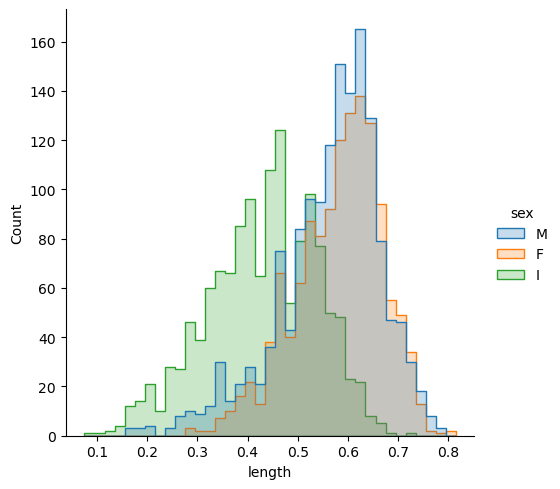

In [18]:
#lendf = df.iloc[:, 'sex':'length']
lendf = df[['sex','length']]
lendf
sns.displot(lendf, x='length', hue = 'sex', element='step')

For the next phase of plotting, it will be useful to colour code the sex variable to see how it affects the distribution of other variables.

Histograms for all? why/why not?
all numerical variables distributed against themselves (include rings)

all numerical variables scatterplot against rings (exclude rings)


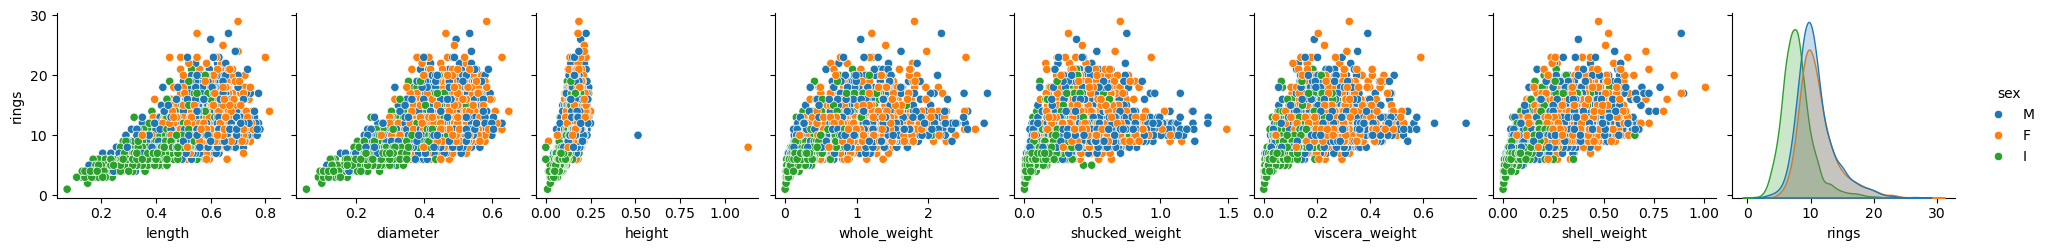

In [21]:
sns.pairplot(df, hue = 'sex', y_vars = 'rings')#y_vars = 'rings'

***

# Project
***
Conduct an analysis of classification algorithms applied to the abalone.csv data set. Begin by explaining supervised learning and the concept of classification algorithms.
Describe at least one common classification algorithm and demonstrate it using the scikit-learn Python library. Throughout the notebook, use appropriate plots, mathematical notation, and diagrams to explain the relevant concepts.

## Supervised Learning 
Machine Learning

Supervised Learning (labelled data)

## Classification Algorithms.
aims to predict classes/category from input data 

Rings show age (+1.5 gives age in years), so these will be the outputs used to train the dataset. 

Classification algorithms:
kNN
Chi square test


## K Nearest Neighbour
Basic explanation
Why to use it here
use it 
show plots

## Chi Square Test
Used to test independence of categorical data. Used on matrix of frequencies of two categorical variables (contingency table). Could be used to compare gender and age range? need to eliminate infants from data set?

# References

1. UC Irvine Machine Learning Repository - information on Abalone dataset https://archive.ics.uci.edu/dataset/1/abalone
2. Categorical Variables - https://statisticsbyjim.com/glossary/categorical-variables/
3. Supervised and Unsupervised learning - https://www.geeksforgeeks.org/supervised-unsupervised-learning/
4. Top 6 Machine Learning Classification Algorithms - https://www.geeksforgeeks.org/top-6-machine-learning-algorithms-for-classification/